In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

### Data cleaning and preprocessing


In [2]:
xls = pd.ExcelFile("/content/sample_data/E Commerce Dataset.xlsx")
df = pd.read_excel(xls, 'E Comm')

In [3]:
df

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,55626,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,150.71
5626,55627,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,Fashion,5,Married,6,0,16.0,1.0,2.0,NaN,224.91
5627,55628,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186.42
5628,55629,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,178.90


In [4]:
#drop the row if all columns are empty
df.dropna(how="all")

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,55626,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,150.71
5626,55627,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,Fashion,5,Married,6,0,16.0,1.0,2.0,NaN,224.91
5627,55628,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186.42
5628,55629,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,178.90


In [5]:
df['PreferredLoginDevice'] = df['PreferredLoginDevice'].replace('Phone', 'Mobile Phone')


In [6]:
df['PreferredPaymentMode'] = df['PreferredPaymentMode'].replace('Cash on Delivery', 'COD')

In [7]:
df['PreferredPaymentMode'] = df['PreferredPaymentMode'].replace('CC', 'Credit Card')

In [8]:
df['PreferedOrderCat'] = df['PreferedOrderCat'].replace('Mobile', 'Mobile Phone')

In [9]:
#Interpolation use for estimation to fill NaN values
processed_data=df.interpolate()

In [10]:
processed_data.isnull().sum()

CustomerID                     0
Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

In [11]:
processed_data.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000
mean,52815.500000,0.168384,10.168917,1.654707,15.646181,2.907194,3.688988,3.066785,4.214032,0.284902,15.720160,1.741741,3.005062,4.571670,177.223030
std,1625.385339,0.374240,8.453961,0.915389,8.502595,0.719248,1.023999,1.380194,2.583586,0.451408,3.643613,1.876301,2.898703,3.607487,49.207036
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,3.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,54222.750000,0.000000,16.000000,3.000000,20.500000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


In [12]:
processed_data.shape

(5630, 20)

In [13]:
processed_data.columns

Index(['CustomerID', 'Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

In [14]:
processed_data.nunique()

CustomerID                     5630
Churn                             2
Tenure                           77
PreferredLoginDevice              2
CityTier                          3
WarehouseToHome                  67
PreferredPaymentMode              5
Gender                            2
HourSpendOnApp                   12
NumberOfDeviceRegistered          6
PreferedOrderCat                  5
SatisfactionScore                 5
MaritalStatus                     3
NumberOfAddress                  15
Complain                          2
OrderAmountHikeFromlastYear      42
CouponUsed                       36
OrderCount                       27
DaySinceLastOrder                40
CashbackAmount                 2586
dtype: int64

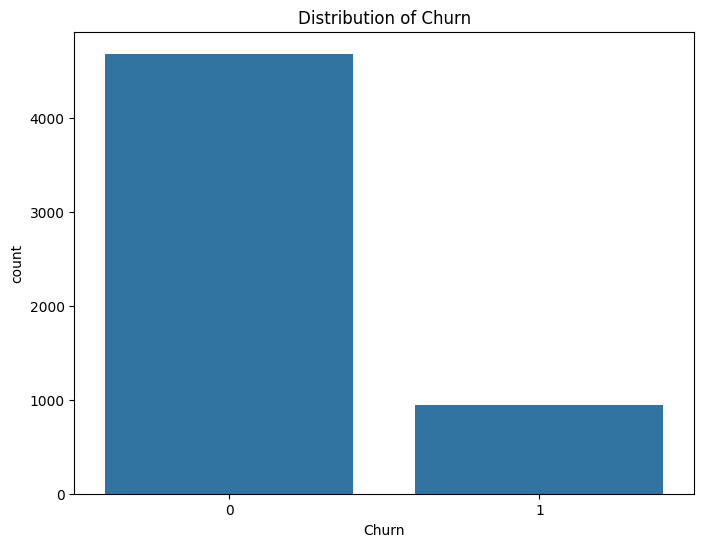

In [15]:
# Distribution of Churn
plt.figure(figsize=(8, 6))
sns.countplot(x='Churn', data=processed_data)
plt.title('Distribution of Churn')
plt.show()

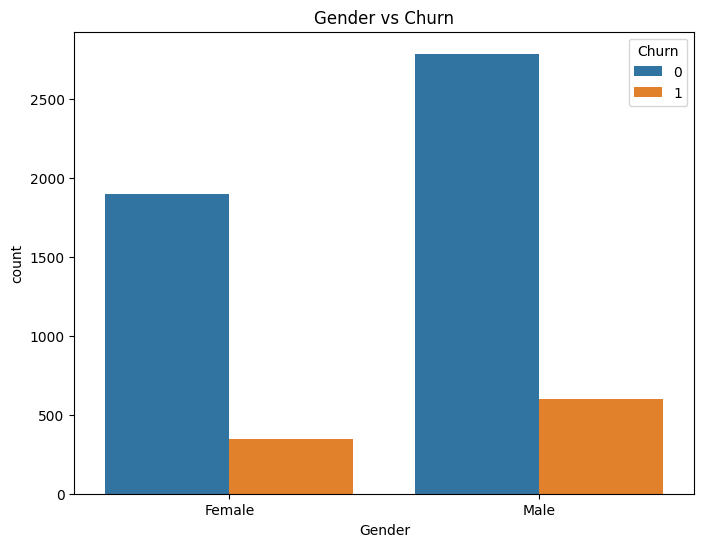

In [16]:
# Gender and Churn
plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', hue='Churn', data=processed_data)
plt.title('Gender vs Churn')
plt.show()


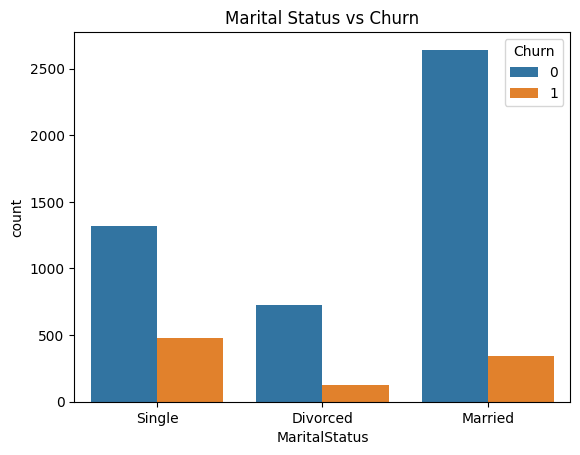

In [17]:
sns.countplot(x='MaritalStatus', hue='Churn', data=processed_data)
plt.title('Marital Status vs Churn')
plt.show()

### Purchase Behavior Analysis:

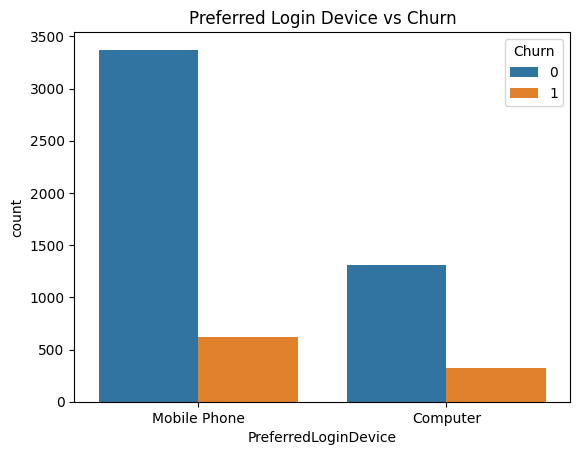

In [18]:
#Preferred Login Device vs Churn

sns.countplot(x='PreferredLoginDevice', hue='Churn', data=processed_data)
plt.title('Preferred Login Device vs Churn')
plt.show()

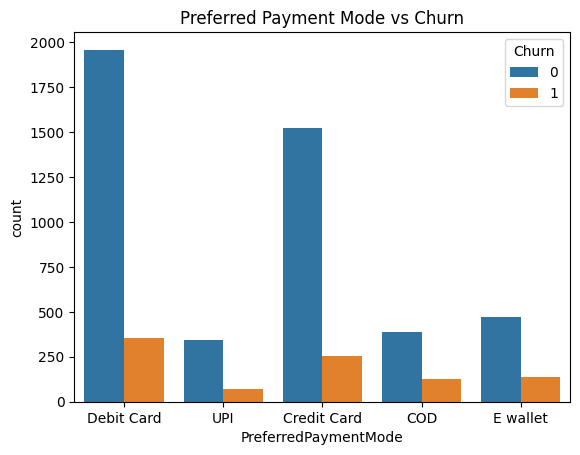

In [19]:
#Preferred Payment Mode vs Churn

sns.countplot(x='PreferredPaymentMode', hue='Churn', data=processed_data)
plt.title('Preferred Payment Mode vs Churn')
plt.show()

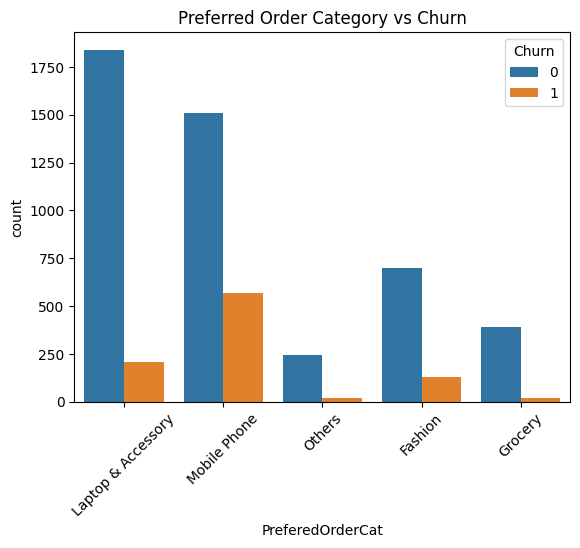

In [20]:
#Preferred Order Category vs Churn

sns.countplot(x='PreferedOrderCat', hue='Churn', data=processed_data)
plt.title('Preferred Order Category vs Churn')
plt.xticks(rotation=45)
plt.show()

### Behavioral Analysis:

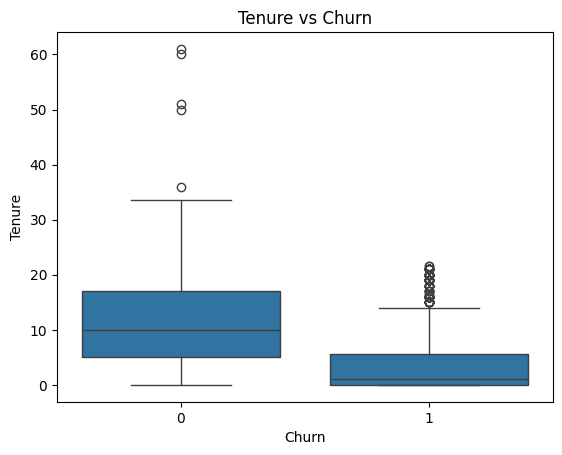

In [21]:
#Tenure vs Churn

sns.boxplot(x='Churn', y='Tenure', data=processed_data)
plt.title('Tenure vs Churn')
plt.show()

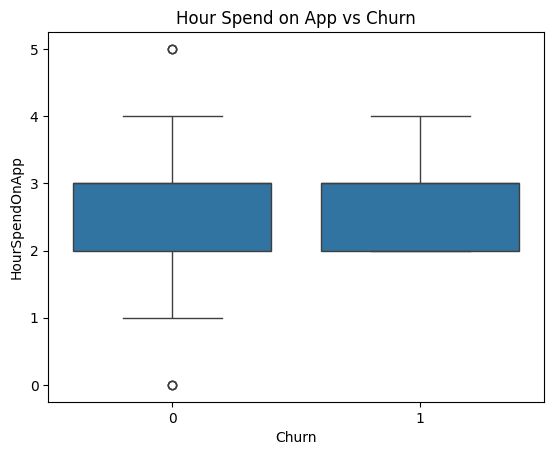

In [22]:
#Hour Spend on App vs Churn

sns.boxplot(x='Churn', y='HourSpendOnApp', data=processed_data)
plt.title('Hour Spend on App vs Churn')
plt.show()

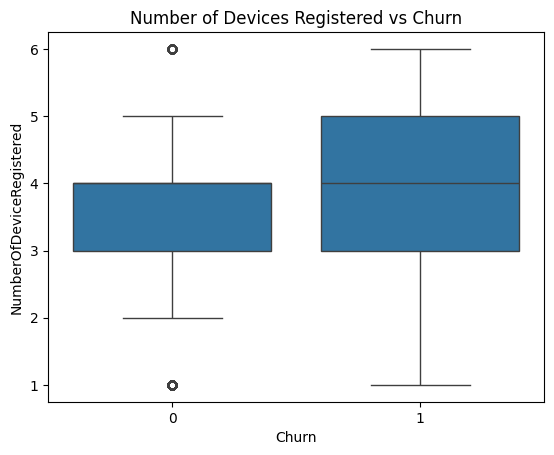

In [23]:
#Number of Devices Registered vs Churn

sns.boxplot(x='Churn', y='NumberOfDeviceRegistered', data=processed_data)
plt.title('Number of Devices Registered vs Churn')
plt.show()

#### Segmentation and Clustering

In [24]:
# Encode categorical variables
le = LabelEncoder()
categorical_columns = ['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus']
mappings = {}
for col in categorical_columns:
  le.fit(processed_data[col])
  mappings[col] = dict(zip(le.transform(le.classes_), le.classes_))
  processed_data[col] = le.transform(processed_data[col])

In [25]:
# Normalize the data
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(processed_data), columns=processed_data.columns)


In [26]:
# Select relevant features for clustering
features = ['Tenure', 'OrderCount', 'OrderAmountHikeFromlastYear', 'CashbackAmount',
            'HourSpendOnApp', 'NumberOfDeviceRegistered', 'PreferredLoginDevice',
            'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'SatisfactionScore', 'MaritalStatus']
df_features = df_scaled[features]

In [27]:
# Assuming the optimal number of clusters is 3 (for example)
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
processed_data['Cluster'] = kmeans.fit_predict(df_features)

# Analyze the clusters
cluster_analysis = processed_data.groupby('Cluster').mean()
print(cluster_analysis)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


           CustomerID     Churn     Tenure  PreferredLoginDevice  CityTier  \
Cluster                                                                      
0        52785.018369  0.227774   7.935709              0.000000  1.661278   
1        53034.594452  0.084544  17.387054              0.819683  1.691546   
2        52710.155717  0.185118   7.305445              1.000000  1.631216   

         WarehouseToHome  PreferredPaymentMode    Gender  HourSpendOnApp  \
Cluster                                                                    
0              15.909870              1.772226  0.626745        2.887093   
1              15.494055              1.727213  0.562087        2.990753   
2              15.599516              1.768784  0.609800        2.871204   

         NumberOfDeviceRegistered  PreferedOrderCat  SatisfactionScore  \
Cluster                                                                  
0                        3.692873          2.312270           2.953711   
1     

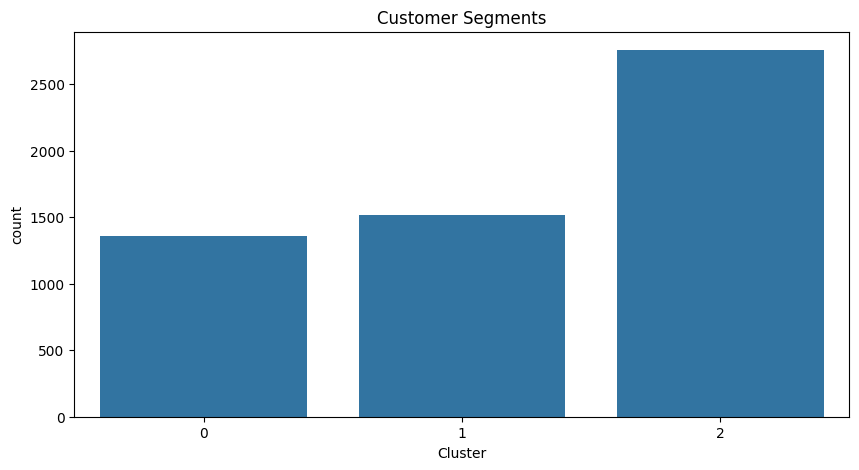

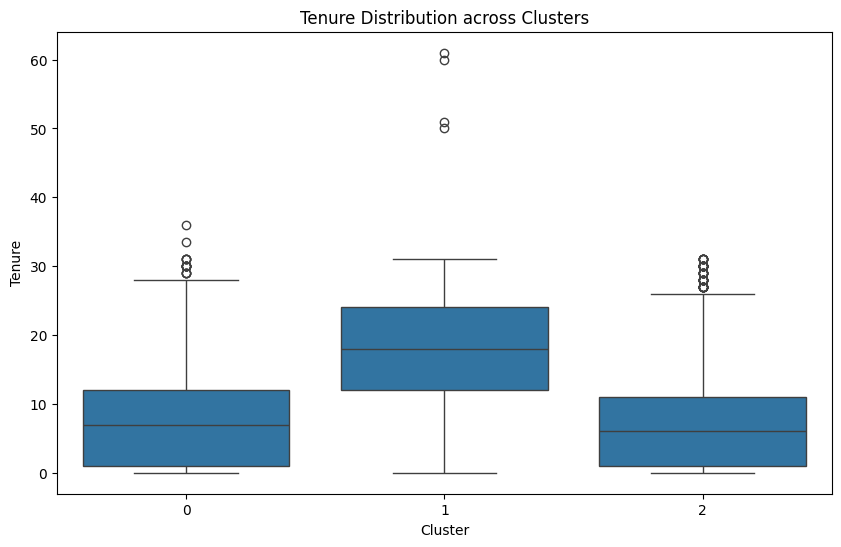

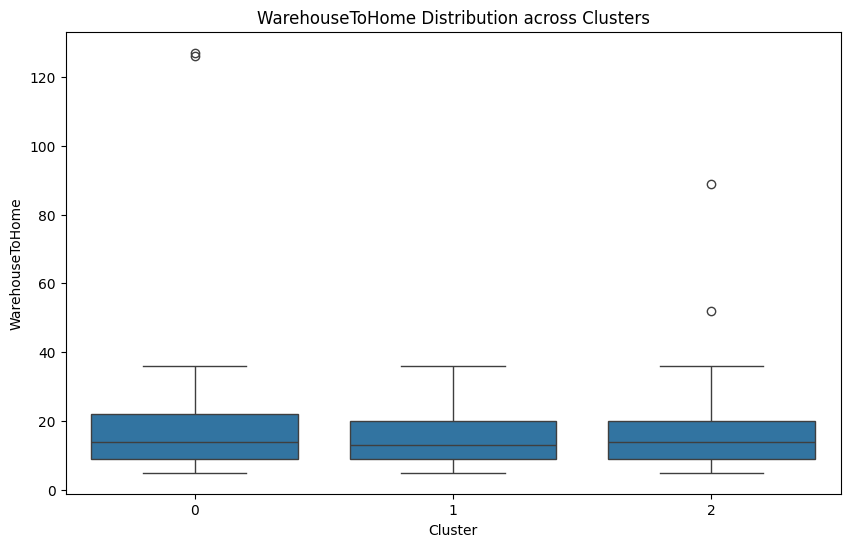

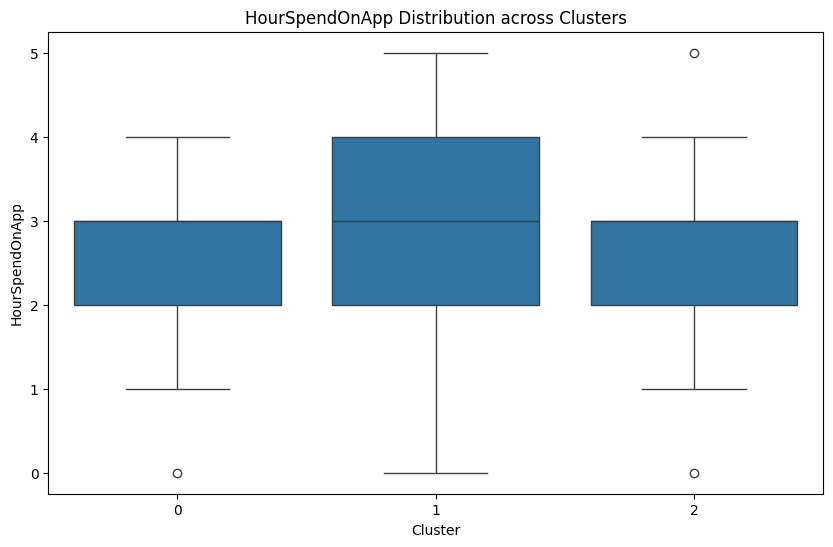

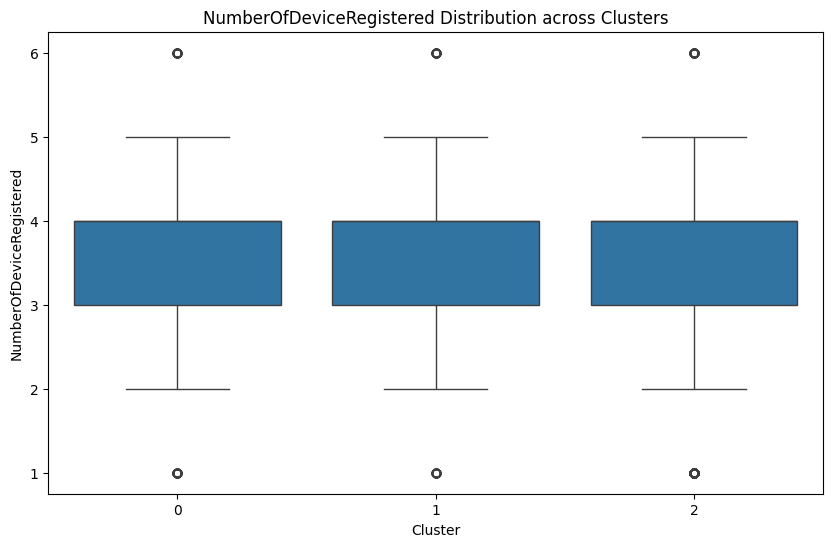

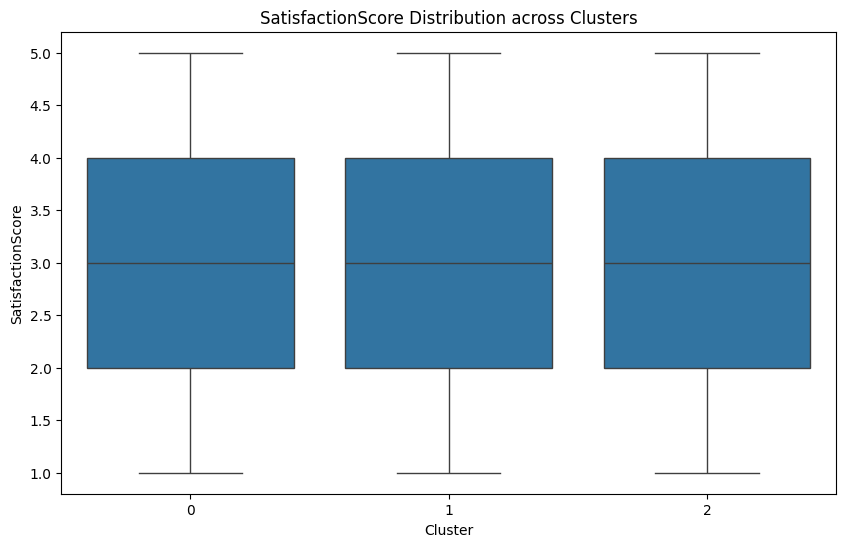

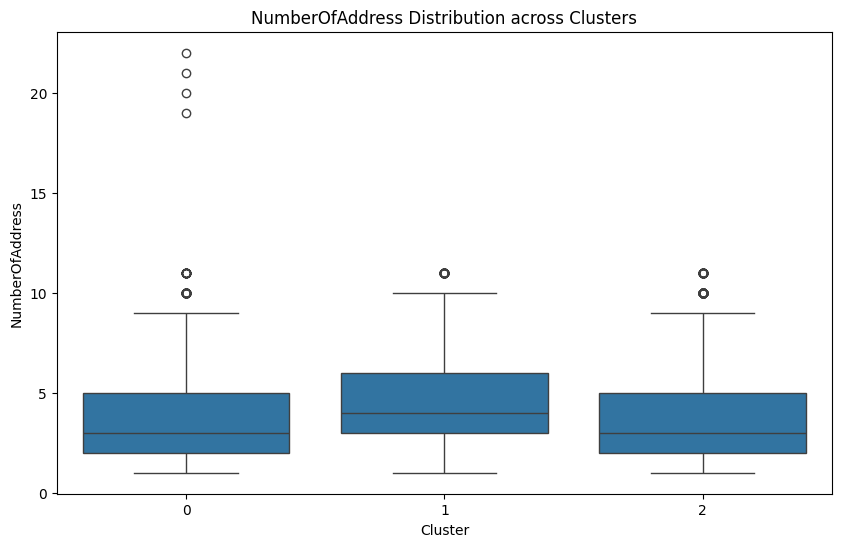

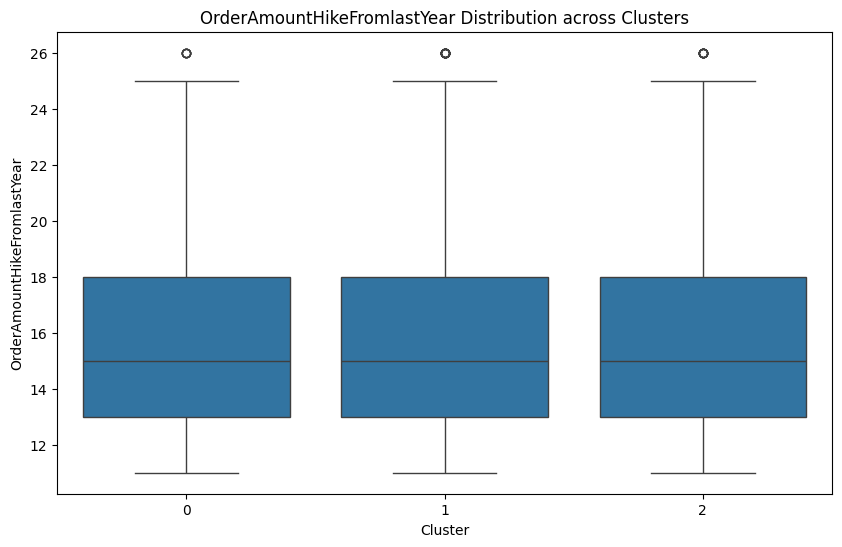

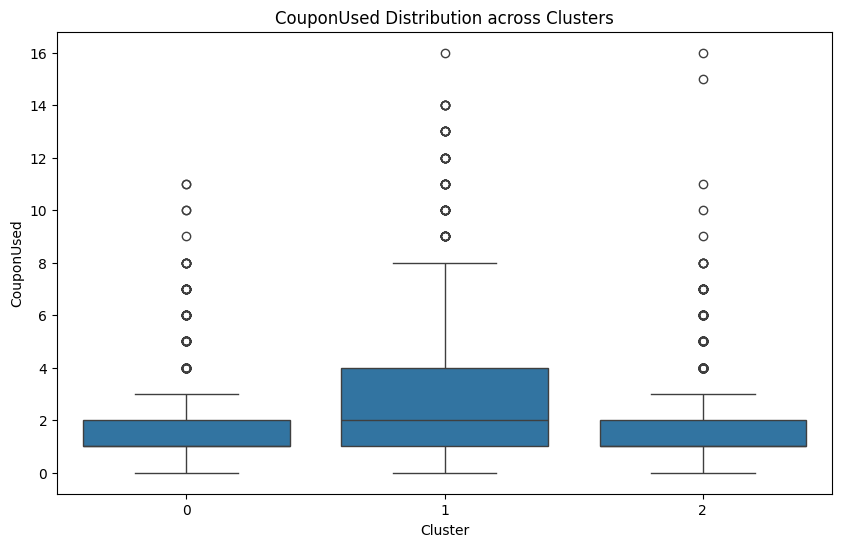

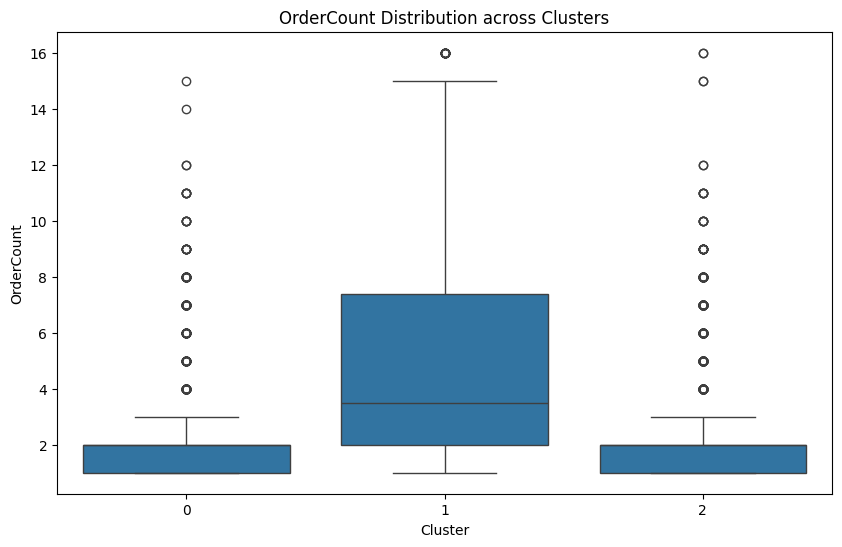

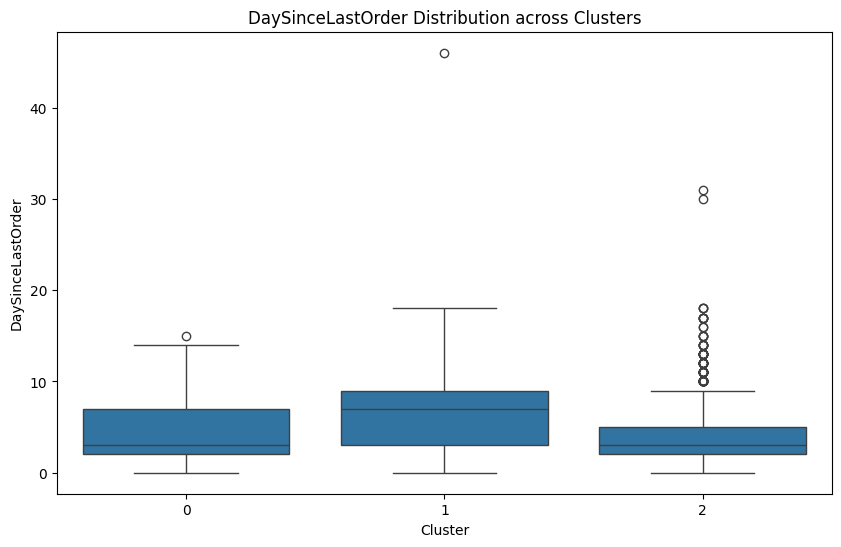

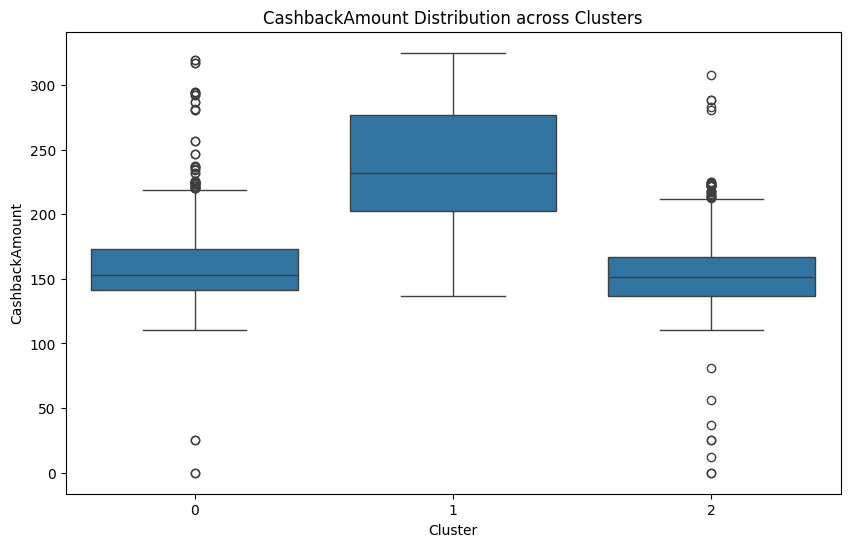

In [28]:
# Function to replace encoded values with original category names
def decode_column(series, mapping):
    inv_map = {v: k for k, v in mapping.items()}
    return series.map(inv_map)

# Visualize the clusters
plt.figure(figsize=(10, 5))
sns.countplot(x='Cluster', data=processed_data)
plt.title('Customer Segments')
plt.show()

# Visualize feature distribution across clusters and plot the boxplots
features_to_plot = ['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']

for feature in features_to_plot:
  plt.figure(figsize=(10, 6))
  if feature in mappings:
    processed_data[feature] = decode_column(processed_data[feature], mappings[feature])
  sns.boxplot(x='Cluster', y=feature, data=processed_data)
  plt.title(f'{feature} Distribution across Clusters')
  plt.show()


#### Predictive modeling


In [29]:
# Split data into features (X) and target (y)
X = processed_data.drop(columns=['Churn', 'CustomerID'])  # Assuming CustomerID is not useful for prediction
y = processed_data['Churn']

In [30]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
# Initialize the models
logreg = LogisticRegression(random_state=42)
rf = RandomForestClassifier(random_state=42)
gb = GradientBoostingClassifier(random_state=42)

In [32]:
# Train the models
logreg.fit(X_train, y_train)
rf.fit(X_train, y_train)
gb.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GradientBoostingClassifier(random_state=42)

In [33]:
# Predict on the test set
y_pred_logreg = logreg.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_gb = gb.predict(X_test)


# Evaluate the models
def evaluate_model(y_test, y_pred):
  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)
  roc_auc = roc_auc_score(y_test, y_pred)
  return accuracy, precision, recall, f1, roc_auc


# Logistic Regression
logreg_metrics = evaluate_model(y_test, y_pred_logreg)
print(f"Logistic Regression: Accuracy={logreg_metrics[0]}, Precision={logreg_metrics[1]}, Recall={logreg_metrics[2]}, F1-Score={logreg_metrics[3]}, ROC-AUC={logreg_metrics[4]}")

# Random Forest
rf_metrics = evaluate_model(y_test, y_pred_rf)
print(f"Random Forest: Accuracy={rf_metrics[0]}, Precision={rf_metrics[1]}, Recall={rf_metrics[2]}, F1-Score={rf_metrics[3]}, ROC-AUC={rf_metrics[4]}")

# Gradient Boosting
gb_metrics = evaluate_model(y_test, y_pred_gb)
print(f"Gradient Boosting: Accuracy={gb_metrics[0]}, Precision={gb_metrics[1]}, Recall={gb_metrics[2]}, F1-Score={gb_metrics[3]}, ROC-AUC={gb_metrics[4]}")

Logistic Regression: Accuracy=0.8925399644760214, Precision=0.7962962962962963, Recall=0.4648648648648649, F1-Score=0.5870307167235495, ROC-AUC=0.7207427406152168
Random Forest: Accuracy=0.9813499111900533, Precision=0.9939759036144579, Recall=0.8918918918918919, F1-Score=0.9401709401709402, ROC-AUC=0.9454145963178907
Gradient Boosting: Accuracy=0.9227353463587922, Precision=0.8602941176470589, Recall=0.6324324324324324, F1-Score=0.7289719626168225, ROC-AUC=0.8061205732831662


In [34]:
results = {
      "Model": ["Logistic Regression", "Random Forest", "Gradient Boosting"],
      "Accuracy": [logreg_metrics[0], rf_metrics[0], gb_metrics[0]],
      "Precision": [logreg_metrics[1], rf_metrics[1], gb_metrics[1]],
      "Recall": [logreg_metrics[2], rf_metrics[2], gb_metrics[2]],
      "F1-Score": [logreg_metrics[3], rf_metrics[3], gb_metrics[3]],
      "ROC-AUC": [logreg_metrics[4], rf_metrics[4], gb_metrics[4]]
}

results_df = pd.DataFrame(results)
print(results_df)

                 Model  Accuracy  Precision    Recall  F1-Score   ROC-AUC
0  Logistic Regression  0.892540   0.796296  0.464865  0.587031  0.720743
1        Random Forest  0.981350   0.993976  0.891892  0.940171  0.945415
2    Gradient Boosting  0.922735   0.860294  0.632432  0.728972  0.806121
